# Prediction of Credit Card Approval using Machine Learning


In [1]:
import pandas as pd # importing pandas for data preprocessing and data manipulation
import numpy as np # importing numpy for linear algebra
# to plot graphs importing seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # importing warnings to ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# By using pandas to read the data from csv file
info = pd.read_csv("application_record.csv") # "application_record.csv" contains the information of applicant
record = pd.read_csv("credit_record.csv") # "credit_record.csv" contains the credit histoy status

- ID: Unique Id of the row
- CODE_GENDER: Gender of the applicant. M is male and F is female.
- FLAG_OWN_CAR: Does the applicant own a car. Y is Yes and N is NO.
- FLAG_OWN_REALTY: Does the applicant own a property. Y is Yes and N is No.
- CNT_CHILDREN: Count of children.
- AMT_INCOME_TOTAL: the amount of the income.
- NAME_INCOME_TYPE: The type of income (5 types in total).
- NAME_EDUCATION_TYPE: Type of education (5 types in total).
- NAME_FAMILY_STATUS: Type of family status (6 types in total).
- DAYS_BIRTH: The number of the days from birth (Negative values).
- DAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.
- FLAG_MOBIL: Does the applicant own a mobile. 1 is True and 0 is False.
- FLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.
- FLAG_PHONE: Does the applicant own a phone. 1 is True and 0 is False.
- FLAG_EMAIL: Does the applicant have an email. 1 is True and 0 is False.
- OCCUPATION_TYPE: Type of occupation (19 types in total). This column has missing values.
- CNT_FAM_MEMBERS: The count of family members

In [3]:
info.head() # Displaying the first 5 rows of the dataframe by using head function

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
info.shape # Checking the shape of "info" dataframe

(438557, 18)

In [5]:
record.head() # Displaying the first 5 rows of "record" dataframe

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
record.shape # Checking the shape of "record" dataframe

(1048575, 3)

In [7]:
# Converting the negative values of 'MONTHS_BALANCE' column in record dataframe to positive
record['MONTHS_BALANCE'] = record['MONTHS_BALANCE'].apply(lambda x : x*(-1))

In [8]:
# By using groupby function and defining the maximum month balance of each applicant
record1 = record.groupby(["ID"]).agg({'MONTHS_BALANCE': max})

In [9]:
record1.shape # Displaying the new record dataframe  

(45985, 1)

In [10]:
# To know the applicant credit record, merging the applicant_record.csv (info dataframe) with 
# the credit_record.csv (record1 data frame) into new dataframe "df"
df = pd.merge(info,record1,on="ID")

In [11]:
df.shape

(36457, 19)

In [12]:
df.head()  # Displaying first 5 rows of "df" dataframe

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26


In [13]:
# In the record dataframe replacing 'C's and 'X's in the STATUS to -1
record['STATUS'][record["STATUS"] == 'C'] = -1 
record['STATUS'][record["STATUS"] == 'X'] = -1
record.head() # Checking for first 5 rows

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,-1


In [14]:
# In the record dataframe converting the dtype of 'STATUS' to int
record['STATUS'] = record.STATUS.apply(lambda x : int(x))

In [15]:
# Droping the duplicates from 'ID'
record.drop_duplicates(subset = ['ID'],inplace = True)
record.shape

(45985, 3)

In [16]:

record['TARGET'] = record.STATUS.apply(lambda x : 0 if x>=0 else 1)
record.drop(['STATUS','MONTHS_BALANCE'],axis = 1,inplace = True)
record.head() # Checking the first 5 rows

,ID,TARGET
0,5001711,1
4,5001712,1
23,5001713,1
45,5001714,1
60,5001715,1


In [17]:
df = pd.merge(df, record, on = "ID") # Merging the TARGET with the features

In [18]:
df.head() # Checking the first 5 rows

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


In [19]:
df.isnull().sum() # Checking for missing values

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
MONTHS_BALANCE             0
TARGET                     0
dtype: int64

In [20]:
df['OCCUPATION_TYPE'].mode() # Checking mode() of the feature

0    Laborers
dtype: object

In [21]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Laborers') # Filling the missing values with the mode

In [22]:
df.isnull().sum() # Checking for missing values again

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
TARGET                 0
dtype: int64

In [23]:
df.head() # Checking the first 5 rows

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


In [24]:
df = df.drop(['ID'],1) # Dropping ID column

In [25]:
df.duplicated().sum() # Checking for duplicates

3581

In [26]:
df = df.drop_duplicates() # Dropping duplicates

In [27]:
df.shape

(32876, 19)

### EDA

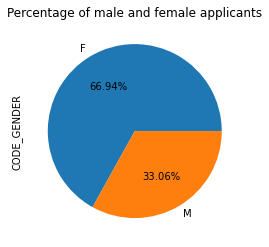

In [28]:
# Plotting a pie chart for gender distribution
Gender_proportion = df.CODE_GENDER.value_counts(normalize = True)
Gender_proportion.plot.pie(autopct="%.2f%%")
plt.title("Percentage of male and female applicants")
plt.show()

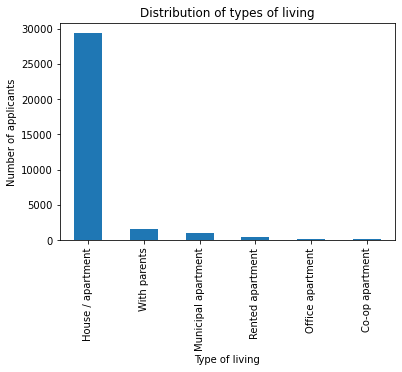

In [29]:
# Plotting bar graph for housing
Housing = df.NAME_HOUSING_TYPE.value_counts()
Housing.plot.bar()
plt.title("Distribution of types of living")
plt.xlabel("Type of living")
plt.ylabel("Number of applicants")
plt.show()

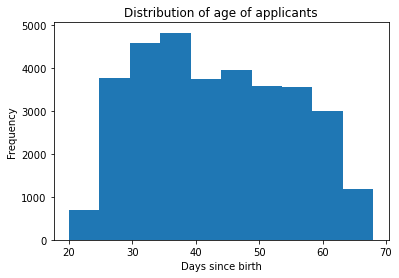

In [30]:
# Plotting histogram for age
df['DAYS_BIRTH'] =-(df['DAYS_BIRTH'])//365  # Converting the number of days since birth to years
df['DAYS_BIRTH'].plot.hist()
plt.title("Distribution of age of applicants")
plt.xlabel("Days since birth")
plt.show()

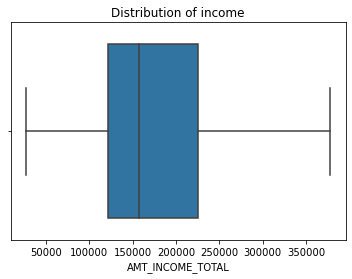

In [31]:
# Income distribution 
sns.boxplot(df.AMT_INCOME_TOTAL, showfliers = False)
plt.title("Distribution of income")
plt.show()

In [32]:
# Encoding Binary features

df['CODE_GENDER'] = df['CODE_GENDER'].replace(['F','M'],[0,1])

df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].replace(['N','Y'],[0,1])

df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].replace(['N','Y'],[0,1])

In [33]:
# Encoding Categorical features

df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].replace(['Student','Commercial associate','State servant','Working','Pensioner'],
                                                        [0,1,2,3,4])
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].replace(['Lower secondary','Secondary / secondary special',
                                                               'Incomplete higher','Higher education','Academic degree'],
                                                             [0,1,2,3,4])
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace(['Widow','Separated','Single / not married',
                                                             'Civil marriage','Married'],
                                                            [0,1,2,3,4])
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].replace(['House / apartment','Co-op apartment','Municipal apartment',
                                                           'With parents','Office apartment','Rented apartment'],
                                                         [5,4,3,2,1,0])
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].replace(['Low-skill Laborers','Laborers','Cleaning staff','Security staff',
                                                       'Cooking staff','Drivers','Sales staff','Waiters/barmen staff',
                                                       'Core staff','Private service staff','HR staff','Secretaries',
                                                       'IT staff','Realty agents','Medicine staff','Accountants',
                                                       'Managers','High skill tech staff'],
                                                     [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

In [34]:
df['DAYS_EMPLOYED'] = -(df['DAYS_EMPLOYED'].apply(lambda x : 0 if x>=0 else x))//365

df = df.rename(columns={'DAYS_BIRTH': 'AGE', 'DAYS_EMPLOYED': 'EXPERIENCE'}, index={'ONE': 'one'})

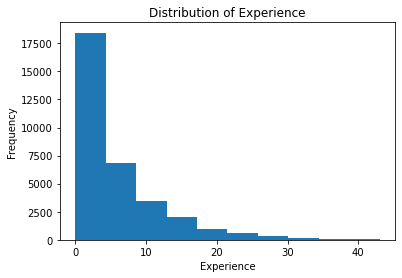

In [35]:
df['EXPERIENCE'].plot.hist()
plt.title("Distribution of Experience")
plt.xlabel("Experience")
plt.show()

In [36]:
df.shape

(32876, 19)

In [37]:
df.head() # Displaying first 5 rows

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,EXPERIENCE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,TARGET
0,1,1,1,0,427500.0,3,3,3,0,32,12,1,1,0,0,1,2.0,15,1
1,1,1,1,0,427500.0,3,3,3,0,32,12,1,1,0,0,1,2.0,14,1
2,1,1,1,0,112500.0,3,1,4,5,58,3,1,0,0,0,3,2.0,29,1
3,0,0,1,0,270000.0,1,1,2,5,52,8,1,0,1,1,6,1.0,4,0
4,0,0,1,0,270000.0,1,1,2,5,52,8,1,0,1,1,6,1.0,26,1


<AxesSubplot:>

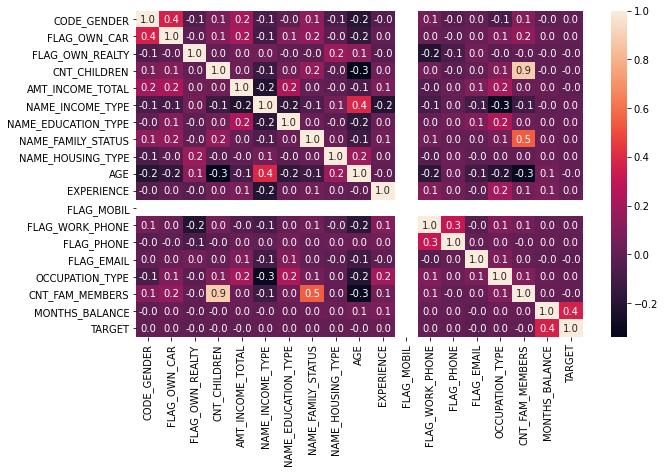

In [38]:
# Correlation matrix
corr_mat = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_mat, xticklabels = corr_mat.columns.values, yticklabels = corr_mat.columns.values, annot= True, fmt ='.1f')

In [39]:
df['TARGET'].value_counts() 

1    24612
0     8264
Name: TARGET, dtype: int64

#### Selecting features and Target variables

In [40]:
# Importing the required packages for building the model 
from sklearn.model_selection import train_test_split
from collections import Counter

X = df.drop(["TARGET"],1)
y = df["TARGET"]

print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 24612, 0: 8264})


### Splitting the data into train and test

In [41]:
# Splitting the data Training and Testing sets using train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#### Over Sampling

In [42]:
# Reference: 
# https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC
from imblearn.over_sampling import SMOTENC

over_sample = SMOTENC(random_state=0, categorical_features=True)
X_train,y_train = over_sample.fit_resample(X_train,y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({1: 18435, 0: 18435})


### Scaling the data

In [43]:
# Scaling the data by using MinMaxScaler and fitting the train data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

# Transforming the data

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building models

### Decision tree classifier with default parameters

In [44]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(random_state=0).fit(X_train_scaled,y_train) 

# Predicting the target
dtc_pred = dtc.predict(X_test_scaled)

In [45]:
dtc_acc_train = dtc.score(X_train_scaled, y_train)*100
print("Train accuracy:", dtc_acc_train)

Train accuracy: 98.77678329264985


In [46]:
# Evaluating the results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

dt_acc = accuracy_score(y_test, dtc_pred)*100
print("---Metrics---")
print("accuracy: ", accuracy_score(y_test, dtc_pred))
print("Precision: ", precision_score(y_test, dtc_pred))
print("Recall: ", recall_score(y_test, dtc_pred))
print("f1_Score: ", f1_score(y_test, dtc_pred))

---Metrics---
accuracy:  0.6758729772478403
Precision:  0.8100617828773169
Recall:  0.7429172737574875
f1_Score:  0.7750380003377808


<AxesSubplot:title={'center':'Confusion Matrix'}>

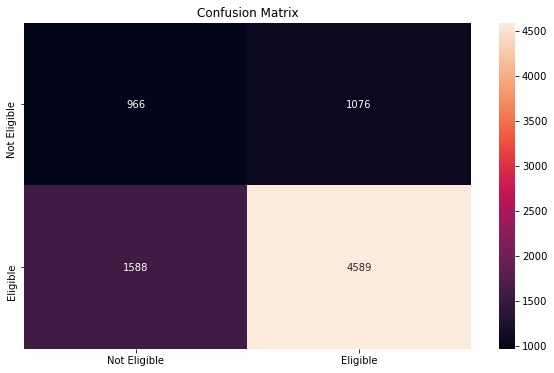

In [47]:
# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, dtc_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('Not Eligible', 'Eligible'), columns = ('Not Eligible', 'Eligible'))
plt.figure(figsize = (10, 6))
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')

#### Decision Tree - Hyper Parameter

In [48]:
# Create a hyper parameter grid to use in the GridSearch for a DecisionTreeclassifier:
param_grid_dt={'max_depth':[2,3,4,10],
           'max_leaf_nodes':[6,10,20,30],
            'min_samples_split':[20,30,40,50]}

In [49]:
# Applying GridSearch on a DecisionTreeClassifier with a multiple parameter:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_search_dt = GridSearchCV(DecisionTreeClassifier(),param_grid_dt,cv=5,return_train_score=True)

grid_search_dt.fit(X_train_scaled,y_train) # Train the model

dt_grid_acc_train = grid_search_dt.score(X_train_scaled, y_train)*100
print("Train accuracy:", dt_grid_acc_train)

dt_bp_acc = grid_search_dt.score(X_test_scaled, y_test)*100 # Evaluate the model

print("Test score is "+str(grid_search_dt.score(X_test_scaled,y_test)*100))
print("Best parameters:"+str(grid_search_dt.best_params_))

Train accuracy: 76.4686737184703
Test score is 75.59313785132011
Best parameters:{'max_depth': 10, 'max_leaf_nodes': 30, 'min_samples_split': 20}


### Random Forest classifier with default parameters

Train accuracy: 98.77407106048278
---Metrics---
accuracy:  0.7454678184694001
Precision:  0.8329258353708231
Recall:  0.8272624251254654
f1_Score:  0.8300844704353476


<AxesSubplot:title={'center':'Confusion Matrix'}>

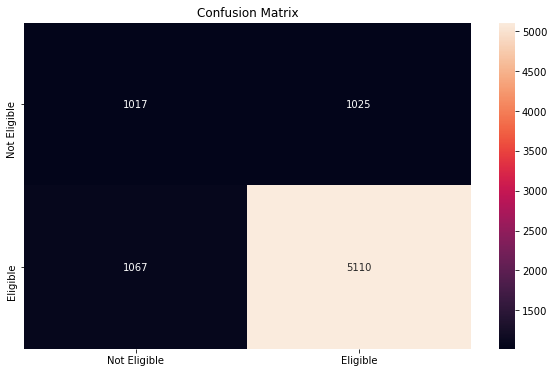

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Fitting the model with train data
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train_scaled, y_train)

# Predicting the target
rfc_pred = rfc.predict(X_test_scaled)

rfc_acc_train = rfc.score(X_train_scaled, y_train)*100
print("Train accuracy:", rfc_acc_train)

#Evaluating the Results
rf_acc = accuracy_score(y_test, rfc_pred)*100
print("---Metrics---")
print("accuracy: ", accuracy_score(y_test, rfc_pred))
print("Precision: ", precision_score(y_test, rfc_pred))
print("Recall: ", recall_score(y_test, rfc_pred))
print("f1_Score: ", f1_score(y_test, rfc_pred))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, rfc_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('Not Eligible', 'Eligible'), columns = ('Not Eligible', 'Eligible'))
plt.figure(figsize = (10, 6))
plt.title('Confusion Matrix')
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')

#### Random Forest - Hyper Parameter

In [51]:
# Create a hyper parameter grid to use in the GridSearch for a RandomForest:
param_grid_rf={
           'max_depth':[None,2,3],
           'max_leaf_nodes':[None,6,10],
            'min_samples_split':[2,20,30] }

In [52]:
# Applying GridSearch on a RandomForestClassifier with a multiple parameter:
from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=0),param_grid_rf,cv=5,n_jobs=-1,return_train_score=True)

grid_search_rf.fit(X_train_scaled,y_train) # Train the model

rfc_grid_acc_train = grid_search_rf.score(X_train_scaled, y_train)*100
print("Train accuracy:", rfc_grid_acc_train)

rf_bp_acc = grid_search_rf.score(X_test_scaled, y_test)*100 # Evaluate the model

print("Test score is "+str(grid_search_rf.score(X_test_scaled,y_test)*100))
print("Best parameters:"+str(grid_search_rf.best_params_))

Train accuracy: 98.77407106048278
Test score is 74.54678184694001
Best parameters:{'max_depth': None, 'max_leaf_nodes': None, 'min_samples_split': 2}


### Logistic Regression

Train accuracy: 73.44724708435042
---Metrics---
accuracy: 0.6860
Precision: 0.8479
Recall: 0.7094
f1_Score: 0.7725


<AxesSubplot:title={'center':'Confusion Matrix'}>

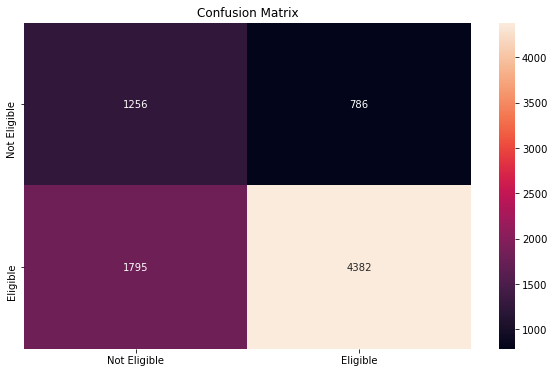

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Fitting the model with train data
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_scaled, y_train)

# Predicting the target
lr_pred = classifier.predict(X_test_scaled)

# Train Accuracy
lr_acc_train = classifier.score(X_train_scaled, y_train)*100
print("Train accuracy:", lr_acc_train)

#Evaluating the Results
lr_acc = accuracy_score(y_test, lr_pred)*100
print("---Metrics---")
print("accuracy: %.4f" %accuracy_score(y_test, lr_pred))
print("Precision: %.4f" %precision_score(y_test, lr_pred))
print("Recall: %.4f" %recall_score(y_test, lr_pred))
print("f1_Score: %.4f" %f1_score(y_test, lr_pred))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, lr_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('Not Eligible', 'Eligible'), columns = ('Not Eligible', 'Eligible'))
plt.figure(figsize = (10, 6))
plt.title('Confusion Matrix')
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')

#### Logistic Regression - Hyper Parameter

In [54]:
#import GridseachCV
from sklearn.model_selection import GridSearchCV

#Instantiate
clf = LogisticRegression()

#Grid
parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}

#Gridsearch
gridsearch = GridSearchCV(clf, parameter_grid)
gridsearch.fit(X_train_scaled, y_train);

# Train Accuracy
lr_bp_acc_train = gridsearch.score(X_train_scaled, y_train)*100
print("Train accuracy:", lr_bp_acc_train)

#Get best hyperparameters
gridsearch.best_params_


lr_bp_acc = gridsearch.score(X_test_scaled,y_test)*100 # Evaluate the model

print("Test score is "+str(gridsearch.score(X_test_scaled,y_test)*100))
print("Best parameters:"+str(gridsearch.best_params_))

Train accuracy: 74.47518307567128
Test score is 69.2541671736221
Best parameters:{'C': 100, 'penalty': 'l2'}


### Artificial Neural Network

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers
from tensorflow import random
from tensorflow.keras.regularizers import l2

random.set_seed(0)
# Build the network
network = Sequential([
    Dense(10,activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.003)),
    Dense(6,activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.003)),
    Dense(1, activation='sigmoid')])

In [56]:
# Compile the network
network.compile(loss = 'binary_crossentropy', 
                optimizer = Adam(learning_rate=0.001), 
                metrics = ['accuracy'])

In [57]:
# Train the network
history = network.fit(X_train_scaled,
                      y_train,
                      epochs=10,
                      batch_size=128,
                      validation_split=0.2,
                      verbose=0)

In [58]:
ann_train_acc = history.history['accuracy']
ann_train_acc = ann_train_acc[9]*100
print('train accuracy:',ann_train_acc)

train accuracy: 73.95240068435669


In [59]:
# Test Accuracy of the network
ann_test_loss, ann_test_acc = network.evaluate(X_test_scaled, y_test)

257/257 [==============================] - 0s 926us/step - loss: 0.5263 - accuracy: 0.7610


In [60]:
ann_test_acc = ann_test_acc*100
print('test_acc:', ann_test_acc)

test_acc: 76.10414624214172


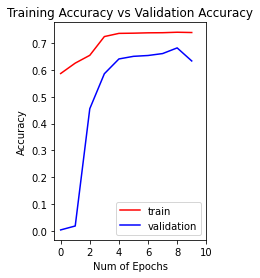

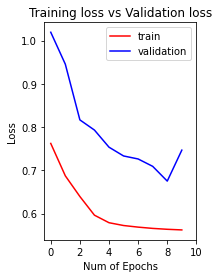

In [61]:
# plot the Accuracies and Losses
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'r', history.history['val_accuracy'], 'b')
plt.xticks(np.arange(0, 11, 2.0))
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'r', history.history['val_loss'], 'b')
plt.xticks(np.arange(0, 11, 2.0))
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training loss vs Validation loss")
plt.legend(['train','validation'])

In [62]:
# Creating accuracy data of lists and then converting it to the dataframe
accuracy = pd.DataFrame({'Model':['Decision Tree', 'Decision Tree with Best Parameters','Random Forest', 
                         'Random Forest with Best Parameters','Logistic Regression',
                         'Logistic Regression with Best Parameters','Artificial Neural Network'],
                         'Training Accuracy':[dtc_acc_train, dt_grid_acc_train, rfc_acc_train, rfc_grid_acc_train, lr_acc_train, lr_bp_acc_train, ann_train_acc],
                         'Testing Accuracy':[dt_acc, dt_bp_acc, rf_acc, rf_bp_acc, lr_acc, lr_bp_acc, ann_test_acc]})
#acc_df = pd.DataFrame(accuracy)
accuracy.sort_values(by = 'Testing Accuracy', ascending = False) # sorting the accuracy values descending

,Model,Training Accuracy,Testing Accuracy
6,Artificial Neural Network,73.952401,76.104146
1,Decision Tree with Best Parameters,76.468674,75.593138
2,Random Forest,98.774071,74.546782
3,Random Forest with Best Parameters,98.774071,74.546782
5,Logistic Regression with Best Parameters,74.475183,69.254167
4,Logistic Regression,73.447247,68.597153
0,Decision Tree,98.776783,67.587298
